# Verification Finite Element Result
## Verification is making sure you solve a given set of equations correctly - in this case making sure you solve a FEM problem correctly, by indepedently verifying the result using another approach (here structural mechanics hand calcs).
## Aim: Estimate a finite element solution with an independent estimate or basic calculation to obtain a ballpark estimate for a FEM result.
## Verification of a finite element solution. Here, we employ structural mechanics estimates based on the beam deflection tables, we utilized earlier in the semester.
## Quantify the displacement and stress estimates against the finite element computed solution.
## Recap of linear superposition.
## Given an input file with a defined mesh for the supplied program, you should be able to apply a specified loading, i.e. either a point load or consistent nodal load.
## Given an input file with a defined mesh for the supplied program, you should be able to apply a specified displacement boundary condition.
## You should be able to indentify the displacement of a specified node from the displacement vector.
## You should be able to indentify the stress at a specified node from the stress matrices.
## You should be able to indentify the reaction force at a specified node from the reaction force vector.


## Question 1

In [2]:
#from IPython.display import Image
#Image(filename="BEAM_pointload_end.png",embed=True)

## Consider a beam of length 800mm that is clamped at $x=0$ and loaded by a force $P=1 000$ N (in the negative y-direction) at the right edge $x=800$mm.
## The rectangular beam cross section has a height of $50$mm and width of $10$mm.
## A plane stress analysis can be assumed to be appropriate.
## The bar has a Young's modulus of $E=210$ GPa and Poisson's ratio of $\nu = 0.3$.
## 1.1 Estimate the maximum vertical displacement of the beam [2]

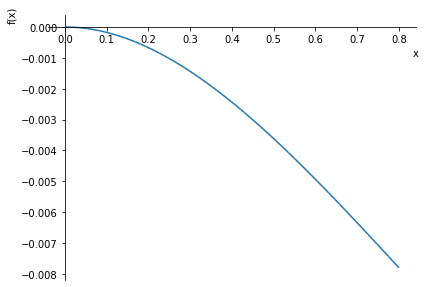

In [3]:
h = 50/1000
w = 10/1000
L = 800/1000
P = -1000
E = 210E9
I = 1/12*w*h**3

import sympy as sp
x = sp.symbols('x')
v = P*x**2*(3*L-x)/(6*E*I)
sp.plot(v,(x,0,0.8))

maxvertical = v.subs({x:0.8})

## 1.2 Estimate the normal and shear stresses in the beam at the points where you expect them to be a maximum [3]

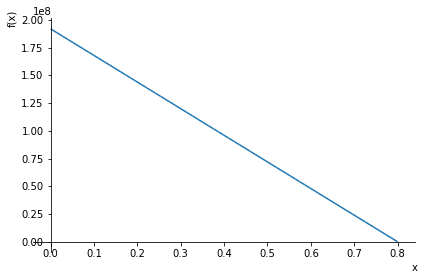

192000000.000000


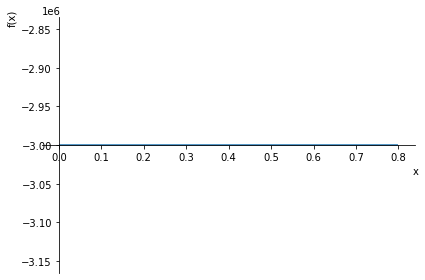

In [4]:
import sympy as sp
x = sp.symbols('x')
M = -P*(L-x)
sxx = M*h/2/I
sp.plot(sxx,(x,0,0.8))
sxxmax = sxx.subs({x:0}); print(sxxmax)

sxy = P*(h/2*w)*h/4/(I*w)
sp.plot(sxy,(x,0,0.8))

## 1.3 Consider the input file beamq1.inp which reflects the problem outlined and modelled using four Q8 elements along the length and two through the thickness. Compute the FEM result and compare against the displacement and stress estimates computed at nodes 15 - 23 for displacement and nodes 1,3,5,7,9 for $\sigma_{xx}$ and 15,17,19,21,23 for $\sigma_{xy}$. Element numbers are indicated in the red rectagles.



In [ ]:
#from IPython.display import Image
#Image(filename="SV_mesh_with_numbers_including_elements.png",embed=True)

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0010 seconds.
Done assembling K and F    :   0.0247 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0010 seconds.
Done computing stresses    :   0.0091 seconds.
Done post-processing stress:   0.0030 seconds.
Done writing output        :   0.0010 seconds.


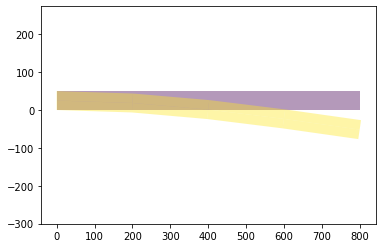

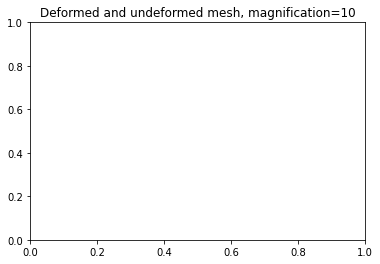

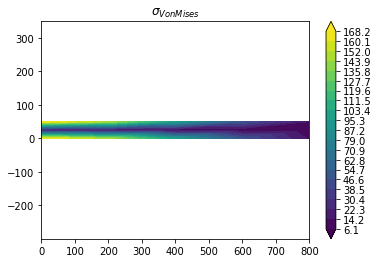

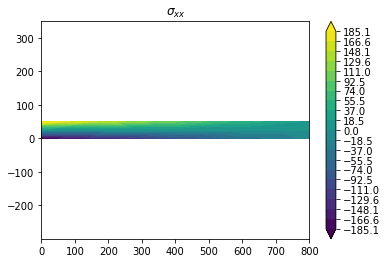

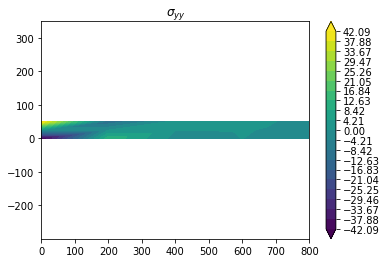

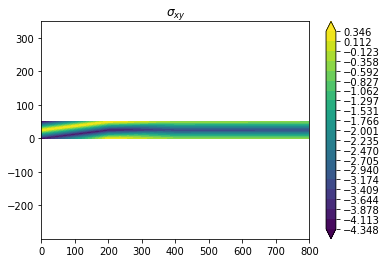

In [5]:
from fem_main_program import launch_fem
U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('beamq1',MagFac=10)
# Consider input file Forces are in Newton and distances in mm -> Stress is in MPa

Note the discontinuity in stress at nodes shared between two elements
It is evident that the beam calculation and FEM computed solutions are closely related - the FEM displacement is slightly lower than beam calc
Only eight FEM elements (2x4) were used in the calculation - see Note where we compute the same problem using only four elements along the length and one through the thickness (1x4), the displacement is even less.


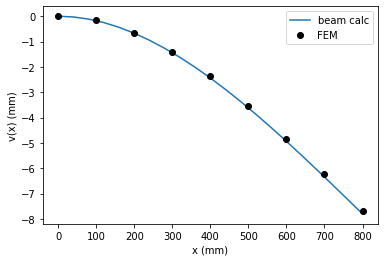

In [6]:
import numpy as np
import matplotlib.pyplot as plt
nodes = np.arange(15,24)
x = np.linspace(0,0.8,21)
plt.plot(x*1000,P*x**2*(3*L-x)/(6*E*I)*1000,label='beam calc') # multiply by 1000 - as estimates are in m not mm
plt.plot([0,100,200,300,400,500,600,700,800],U[2*(nodes-1)+1],'ko',label='FEM');plt.ylabel('v(x) (mm)');plt.xlabel('x (mm)')
plt.legend()

print('Note the discontinuity in stress at nodes shared between two elements')
print('It is evident that the beam calculation and FEM computed solutions are closely related - the FEM displacement is slightly lower than beam calc')
print('Only eight FEM elements (2x4) were used in the calculation - see Note where we compute the same problem using only four elements along the length and one through the thickness (1x4), the displacement is even less.')

Note the discontinuity in stress at nodes shared between two elements
It is evident that the beam calculation and FEM is closely related for sxx


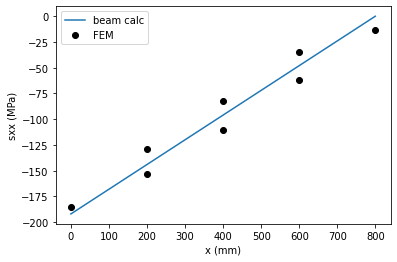

In [7]:
import numpy as np
import matplotlib.pyplot as plt
nodes = np.arange(15,24)
x = np.linspace(0,0.8,21)
M = -P*(L-x)
sxx = M*(-h/2)/I

plt.plot(x*1000,sxx/1E6,label='beam calc')
FEM_STRESSXX_BOTTOM = [SXX[0,0],SXX[0,1],SXX[1,0],SXX[1,1],SXX[2,0],SXX[2,1],SXX[3,0],SXX[3,1]]
plt.plot([0,200,200,400,400,600,600,800],FEM_STRESSXX_BOTTOM,'ko',label='FEM');plt.ylabel('sxx (MPa)');plt.xlabel('x (mm)')
plt.legend()

print('Note the discontinuity in stress at nodes shared between two elements')
print('It is evident that the beam calculation and FEM is closely related for sxx')

[[-1.85074751e+02 -1.53461958e+02  5.45140450e-01  4.52737830e+00]
 [-1.28523409e+02 -1.10399704e+02  1.12656050e+00 -3.28358321e+00]
 [-8.25038439e+01 -6.17798354e+01  1.57021218e-01  4.03963818e-01]
 [-3.43272276e+01 -1.35133821e+01  2.22153377e-01 -4.69114631e-01]
 [-4.52886618e+00 -5.41855939e-01  1.53458673e+02  1.85076239e+02]
 [ 3.27292725e+00 -1.10940640e+00  1.10382550e+02  1.28534065e+02]
 [-4.44068261e-01 -1.04169362e-01  6.17269836e+01  8.25439484e+01]
 [ 4.55952969e-01 -3.52630493e-01  1.36438592e+01  3.43403892e+01]]
Note the discontinuity in stress at nodes shared between two elements
It is evident that the beam calculation and FEM computed solutions are closely related, the FEM computed shear stress is slightly larger than beam calculation


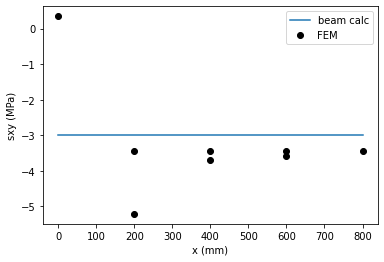

In [8]:
import numpy as np
import matplotlib.pyplot as plt
nodes = np.arange(15,24)
x = np.linspace(0,0.8,21)
sxy = P*(h/2*w)*h/4/(I*w)+x*0

print(SXX)
plt.plot(x*1000,sxy/1E6,label='beam calc') # stress in Pa - divide by 1E6 to obtain MPa
FEM_STRESSXY_BOTTOM = [SXY[0,3],SXY[0,2],SXY[1,3],SXY[1,2],SXY[2,3],SXY[2,2],SXY[3,3],SXY[3,2]]
plt.plot([0,200,200,400,400,600,600,800],FEM_STRESSXY_BOTTOM,'ko',label='FEM');plt.ylabel('sxy (MPa)');plt.xlabel('x (mm)')
plt.legend()

print('Note the discontinuity in stress at nodes shared between two elements')
print('It is evident that the beam calculation and FEM computed solutions are closely related, the FEM computed shear stress is slightly larger than beam calculation')

## Note: Solving same problem using less elements - below we compute the same problem as above, with the only difference being that we use four elements in total (four along length and one through the thickness) instead of eight in total (four along the length and two through the thickness):

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0010 seconds.
Done assembling K and F    :   0.0130 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0010 seconds.
Done computing stresses    :   0.0040 seconds.
Done post-processing stress:   0.0020 seconds.
Done writing output        :   0.0010 seconds.


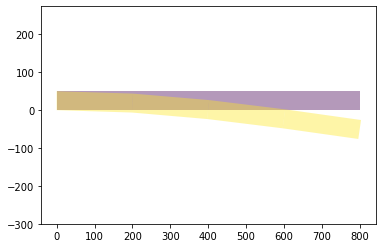

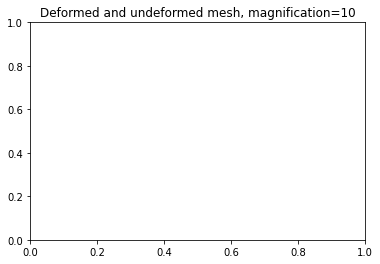

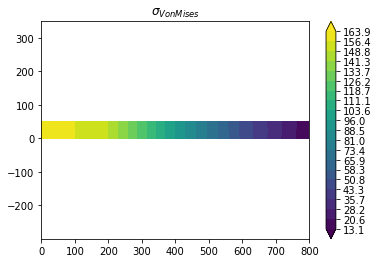

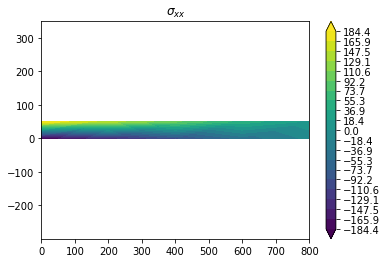

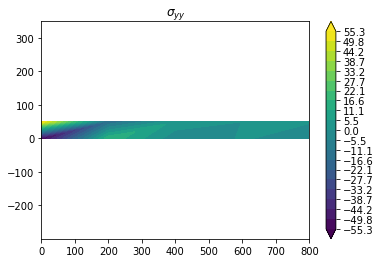

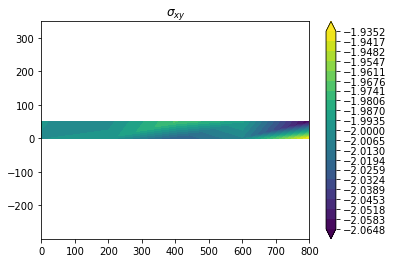

In [9]:
from fem_main_program import launch_fem
U2el, ReactionForces2el, VonMises2el, SXX2el, SYY2el, SXY2el = launch_fem('beamq1_1x4elements',MagFac=10)
# Consider input file Forces are in Newton and distances in mm -> Stress is in MPa

In [10]:
print('Displacement of neutral axis at the tip (x=800mm): {} mm using eight elements in total'.format(U[(23-1)*2+1]))
print('Displacement of neutral axis at the tip (x=800mm): {} mm using four elements in total'.format(U2el[(23-1)*2+1]))
print('The more elements the more flexible the FEM model for this problem')

print('Sxx at top left edge (x=0mm): {} MPa using eight elements in total'.format(SXX[4,3]))
print('Sxx at top left edge (x=0mm): {} MPa using four elements in total'.format(SXX2el[0,3]))
print('The more elements the higher the stress in the FEM model for this problem')

Displacement of neutral axis at the tip (x=800mm): [-7.67673046] mm using eight elements in total
Displacement of neutral axis at the tip (x=800mm): [-7.6080156] mm using four elements in total
The more elements the more flexible the FEM model for this problem
Sxx at top left edge (x=0mm): 185.07623860763326 MPa using eight elements in total
Sxx at top left edge (x=0mm): 184.35792423318384 MPa using four elements in total
The more elements the higher the stress in the FEM model for this problem


## Question 2

In [ ]:
#from IPython.display import Image
#Image(filename="BEAM_twoloadspinned.png",embed=True)

## Consider a beam of length 800mm, that is pinned at both the left edge $x=0$ and right edge $x=800$mm.

## Two point loads of  $P = 500$ N (in the negative y-direction) are applied at $x=100$mm and $x=700$mm respectively.
## The rectangular beam cross section has a height of $50$mm and width of $10$mm.
## A plane stress analysis can be assumed to be appropriate.
## The bar has a Young's modulus of $E=210$ GPa and Poisson's ratio of $\nu = 0.3$.
## 2.1 Estimate the maximum vertical displacement of the beam [2]

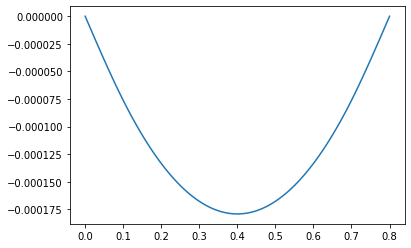

maximum displacement is: -0.00017902896205926517


In [11]:
# case 6 in shigley superposition
h = 50/1000
w = 10/1000
L = 800/1000
P = 500
E = 210E9
I = 1/12*w*h**3

x1 = 0.1
x2 = 0.7

x = np.linspace(0,L,100)
def Dis(xpos):
    if xpos < x1:
        d1 = ((P*(L-x1)*xpos)/(6*E*I*L))*(xpos**2 + (L-x1)**2 -L**2)
        d2 = ((P*(L-x2)*xpos)/(6*E*I*L))*(xpos**2 + (L-x2)**2 -L**2)   
    elif (xpos >= x1) and (xpos < x2):
        d1 = ((P*(x1)*(L-xpos))/(6*E*I*L))*(xpos**2 + (x1)**2 - 2*L*xpos)
        d2 = ((P*(L-x2)*xpos)/(6*E*I*L))*(xpos**2 + (L-x2)**2 -L**2)  
    elif xpos >= x2:
        d1 = ((P*(x1)*(L-xpos))/(6*E*I*L))*(xpos**2 + (x1)**2 - 2*L*xpos)
        d2 = ((P*(x2)*(L-xpos))/(6*E*I*L))*(xpos**2 + (x2)**2 - 2*L*xpos)
       
    return d1+d2

def multiDis(x):
    a = []
    for i in x:
        a.append(Dis(i))
        
    return a


v = multiDis(x)
plt.plot(x,v)
plt.show()

print('maximum displacement is:',min(v))

## 2.2 Estimate the normal and shear stresses in the beam at the points where you expect them to be a maximum [3]

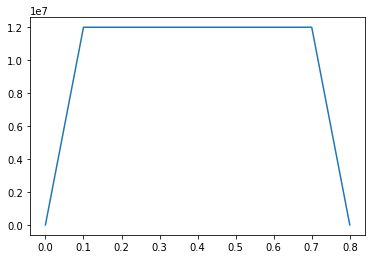

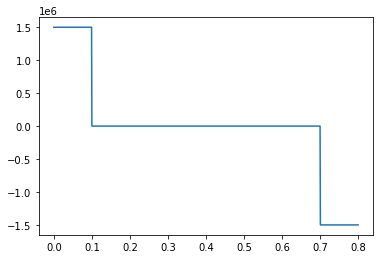

Maximum Normal stress is: -1.3642420526593922e-08 and 12000000.000000007


In [12]:
x = np.linspace(0,L,1000)
def Mom(xpos):
    if xpos < x1:
        mom = ((-P*(x1-xpos)-P*(x2-xpos))  + 400 )/2
    elif (xpos >= x1) and (xpos < x2):
        mom = ((P*(x1-xpos)-P*(x2-xpos)) + 400)/2
    elif xpos >= x2:
        mom = ((P*(x1-xpos)+P*(x2-xpos)) + 400)/2
    return mom

def multiMom(x):
    a = []
    for i in x:
        a.append(Mom(i)*(h/2)/I)
        
    return a

def sxyFunc(xpos):
    a =[]
    for i in xpos:
        if i < x1:
            a.append( P*(h/2*w)*h/4/(I*w))
        elif (i >= x1) and (i < x2): 
            a.append(0)
        elif i >= x2:
            a.append( -P*(h/2*w)*h/4/(I*w))
        
    return a

m = multiMom(x)
plt.plot(x,m)
plt.show()

plt.plot(x,sxyFunc(x))
plt.show()
print('Maximum Normal stress is:', min(m),'and',max(m))

## 2.3 Rename the input file beamq1.inp to beamq2.inp and modify the input file to reflect the outlined problem. Compute the FEM result and compare against the displacement and stress estimates computed at nodes 15 - 23 for displacement and nodes 29,31,33,35,37 for $\sigma_{xx}$ and 15,17,19,21,23 for $\sigma_{xy}$.

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0010 seconds.
Done assembling K and F    :   0.0210 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0010 seconds.
Done computing stresses    :   0.0100 seconds.
Done post-processing stress:   0.0050 seconds.
Done writing output        :   0.0010 seconds.


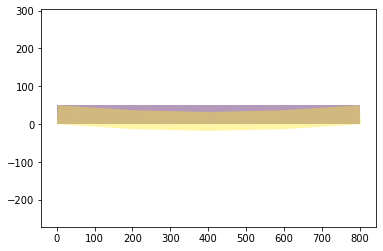

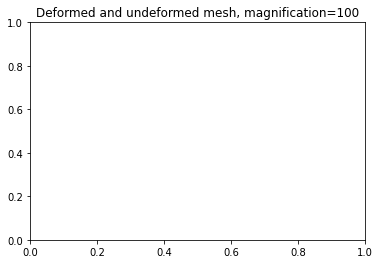

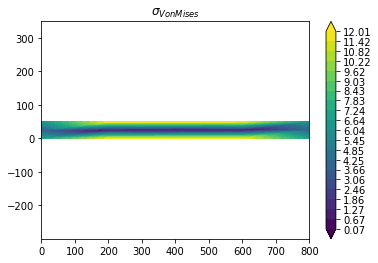

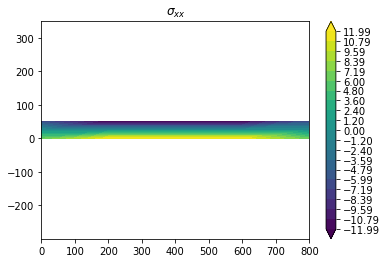

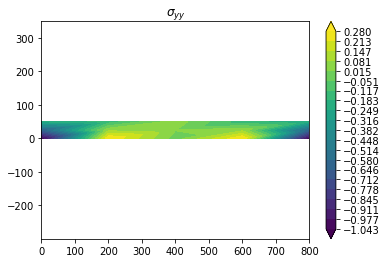

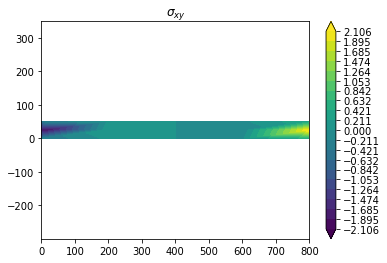

In [13]:
U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('beamq2',MagFac=100)

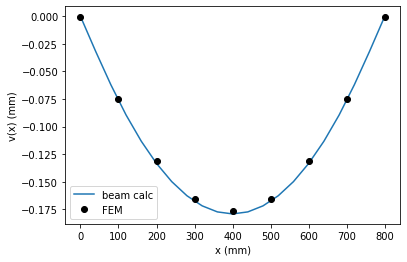

The Fem produces for all practical purposes the same answer in displacements as the beam calculation


In [14]:
nodes = np.arange(15,24)
x = np.linspace(0,0.8,21)
v = np.multiply(multiDis(x),1000)
plt.plot(x*1000, v ,label='beam calc') # multiply by 1000 - as estimates are in m not mm
plt.plot([0,100,200,300,400,500,600,700,800],U[2*(nodes-1)+1],'ko',label='FEM');plt.ylabel('v(x) (mm)');plt.xlabel('x (mm)')
plt.legend()
plt.show()


print('The Fem produces for all practical purposes the same answer in displacements as the beam calculation')

Where the nodes are shared there is a small discontenuity.
The FEM and the Beam corrolate. However more elements will produce more acuureate results at the support locations.


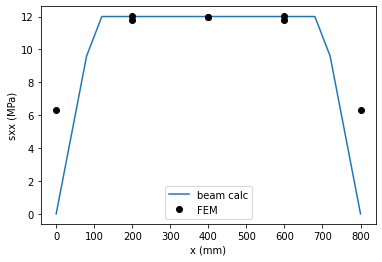

In [15]:
x = np.linspace(0,0.8,21)
sxx = np.divide(multiMom(x),1E6)

plt.plot(x*1000,sxx,label='beam calc')
FEM_STRESSXX_BOTTOM = [SXX[0,0],SXX[0,1],SXX[1,0],SXX[1,1],SXX[2,0],SXX[2,1],SXX[3,0],SXX[3,1]]
plt.plot([0,200,200,400,400,600,600,800],FEM_STRESSXX_BOTTOM,'ko',label='FEM');plt.ylabel('sxx (MPa)');plt.xlabel('x (mm)')
plt.legend()

print('Where the nodes are shared there is a small discontenuity.')
print('The FEM and the Beam corrolate. However more elements will produce more acuureate results at the support locations.')

Still see a discontinuety at the shared nodes. It is small.
The FEM and the beam calculation corrolate well.


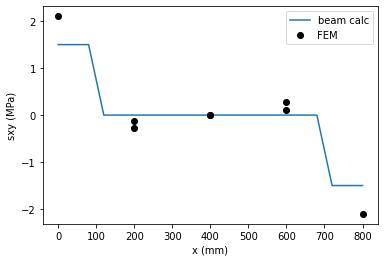

In [16]:
x = np.linspace(0,0.8,21)

sxy = np.divide(sxyFunc(x),1E6)

plt.plot(x*1000,sxy,label='beam calc')
FEM_STRESSXY_BOTTOM = [-SXY[0,3],-SXY[0,2],-SXY[1,3],-SXY[1,2],-SXY[2,3],-SXY[2,2],-SXY[3,3],-SXY[3,2]]
plt.plot([0,200,200,400,400,600,600,800],FEM_STRESSXY_BOTTOM,'ko',label='FEM');plt.ylabel('sxy (MPa)');plt.xlabel('x (mm)')
plt.legend()

print('Still see a discontinuety at the shared nodes. It is small.')
print('The FEM and the beam calculation corrolate well.')

## Question 3

In [ ]:
#from IPython.display import Image
#Image(filename="BEAM_distributedload.png",embed=True)

## Consider a beam of length 800mm, that is pinned at both the left edge $x=0$ and right edge $x=800$mm.

## A distributed load of  $q = 1250$ N/m (in the negative y-direction) is applied uniformly over the entire structure.
## The rectangular beam cross section has a height of $50$mm and width of $10$mm.
## A plane stress analysis can be assumed to be appropriate.
## The bar has a Young's modulus of $E=210$ GPa and Poisson's ratio of $\nu = 0.3$.
## 3.1 Estimate the maximum vertical displacement of the beam [2]

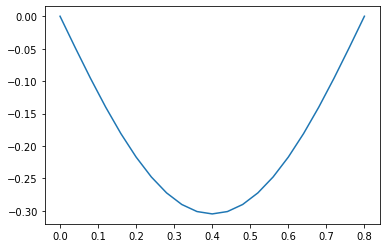

maximum displacement is: -0.30476190476190473


In [19]:
h = 50/1000
w = 10/1000
L = 800/1000
Pq = 1250 #N/m
E = 210E9
I = 1/12*w*h**3

def multiDis(xpos):
    a = []
    for i in x:
        a.append(((Pq*i)/(24*E*I))*(2*L*i**2 - i**3 -L**3))
        
    return a



nodes = np.arange(15,24)
x = np.linspace(0,0.8,21)
v = np.multiply(multiDis(x),1000)

plt.plot(x,v)
plt.show()

print('maximum displacement is:',min(v))

## 3.2 Estimate the normal and shear stresses in the beam at the points where you expect them to be a maximum [3]

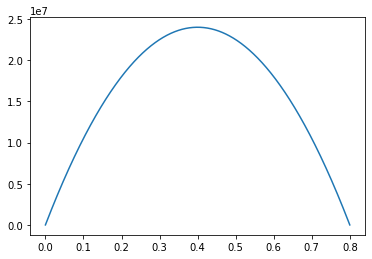

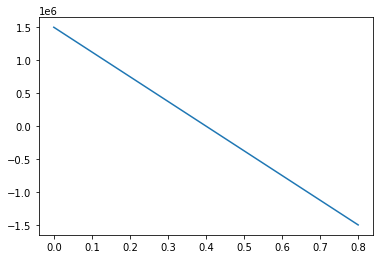

Maximum Normal stress is: 0.0 and 23999975.951927908


In [20]:
#Shigley case A-9


x = np.linspace(0,L,1000)
def Mom(xpos):

    return (Pq*xpos/2)*(L-xpos)

def multiMom(x):
    a = []
    for i in x:
        a.append(Mom(i)*(h/2)/I)
        
    return a

def sxyFunc(xpos):
    a =[]
    for i in xpos:
        a.append((-Pq*i+(Pq*L/2))*(h/2*w)*h/4/(I*w))
        
    return a

m = multiMom(x)
plt.plot(x,m)
plt.show()

plt.plot(x,sxyFunc(x))
plt.show()
print('Maximum Normal stress is:', min(m),'and',max(m))

## 3.3 Rename the input file beamq1.inp to beamq3.inp and modify the input file to reflect the outlined problem. Compute the FEM result and compare against the displacement and stress estimates computed at nodes 15 - 23 for displacement and nodes 29,31,33,35,37 for $\sigma_{xx}$ and 15,17,19,21,23 for $\sigma_{xy}$.

In [ ]:
#from IPython.display import Image
#Image(filename="SV_mesh_with_numbers_including_elements.png",embed=True)

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0010 seconds.
Done assembling K and F    :   0.0229 seconds.
Done solving system        :   0.0010 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0080 seconds.
Done post-processing stress:   0.0040 seconds.
Done writing output        :   0.0010 seconds.


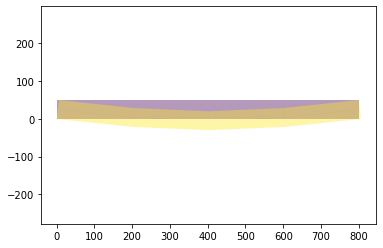

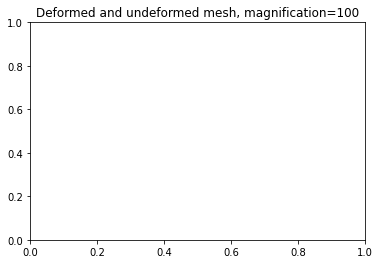

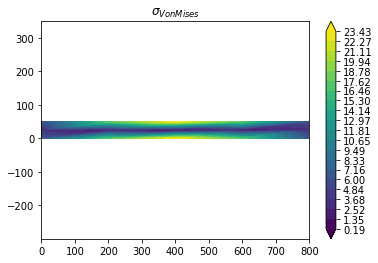

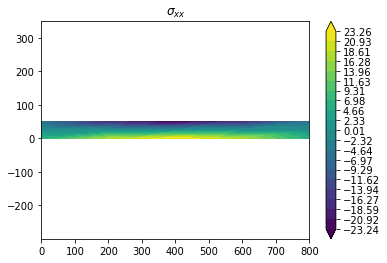

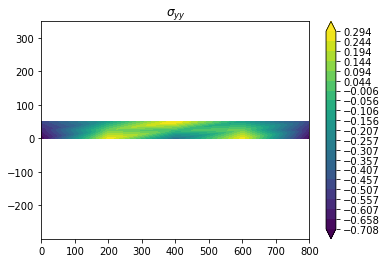

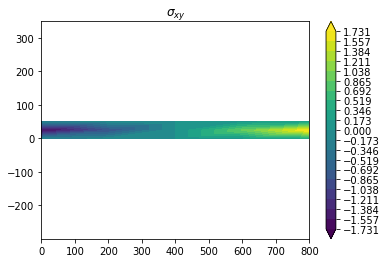

In [21]:
U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('beamq3',MagFac=100)

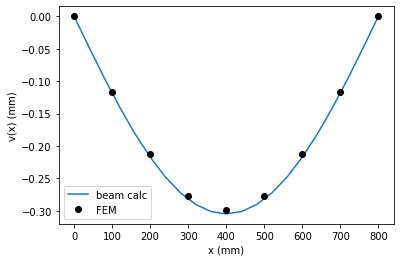

The Fem produces similar answers in displacements as the beam calculation but maybee a little less in magnitude.


In [22]:
def multiDis(xpos):
    a = []
    for i in x:
        a.append(((Pq*i)/(24*E*I))*(2*L*i**2 - i**3 -L**3))
        
    return a



nodes = np.arange(15,24)
x = np.linspace(0,0.8,21)
v = np.multiply(multiDis(x),1000)
plt.plot(x*1000, v ,label='beam calc') # multiply by 1000 - as estimates are in m not mm
plt.plot([0,100,200,300,400,500,600,700,800],U[2*(nodes-1)+1],'ko',label='FEM');plt.ylabel('v(x) (mm)');plt.xlabel('x (mm)')
plt.legend()
plt.show()


print('The Fem produces similar answers in displacements as the beam calculation but maybee a little less in magnitude.')

Stress has discontenueties at shared nodes. 
The FEM and the Beam have a similar shape but errors are getting substantial.Considder more elements.


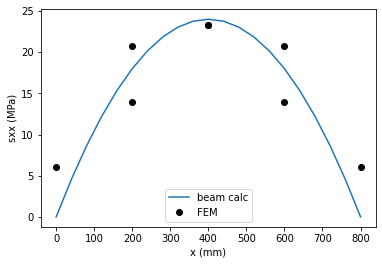

In [23]:
x = np.linspace(0,0.8,21)
sxx = np.divide(multiMom(x),1E6)

plt.plot(x*1000,sxx,label='beam calc')
FEM_STRESSXX_BOTTOM = [SXX[0,0],SXX[0,1],SXX[1,0],SXX[1,1],SXX[2,0],SXX[2,1],SXX[3,0],SXX[3,1]]
plt.plot([0,200,200,400,400,600,600,800],FEM_STRESSXX_BOTTOM,'ko',label='FEM');plt.ylabel('sxx (MPa)');plt.xlabel('x (mm)')
plt.legend()

print('Stress has discontenueties at shared nodes. ')
print('The FEM and the Beam have a similar shape but errors are getting substantial.Considder more elements.')

Still see a discontinuety at the shared nodes. But it is small.
The FEM and the beam calculation corrolate well.


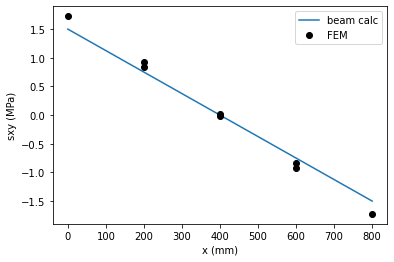

In [24]:
x = np.linspace(0,0.8,21)

sxy = np.divide(sxyFunc(x),1E6)

plt.plot(x*1000,sxy,label='beam calc')
FEM_STRESSXY_BOTTOM = [-SXY[0,3],-SXY[0,2],-SXY[1,3],-SXY[1,2],-SXY[2,3],-SXY[2,2],-SXY[3,3],-SXY[3,2]]
plt.plot([0,200,200,400,400,600,600,800],FEM_STRESSXY_BOTTOM,'ko',label='FEM');plt.ylabel('sxy (MPa)');plt.xlabel('x (mm)')
plt.legend()

print('Still see a discontinuety at the shared nodes. But it is small.')
print('The FEM and the beam calculation corrolate well.')

## Question 4

## Consider a beam of length 800mm, that is pinned at both the left edge $x=0$ and right edge $x=800$mm.

## A distributed load of  $q = 625$ N/m (in the negative y-direction) is applied uniformly over the entire structure. Two point loads of  $P = 250$ N (in the negative y-direction) are applied at $x=100$mm and $x=700$mm respectively.
## The rectangular beam cross section has a height of $50$mm and width of $10$mm.
## A plane stress analysis can be assumed to be appropriate.
## The bar has a Young's modulus of $E=210$ GPa and Poisson's ratio of $\nu = 0.3$.
## 4.1 Estimate the maximum vertical displacement of the beam from the previously computed solutions [2]

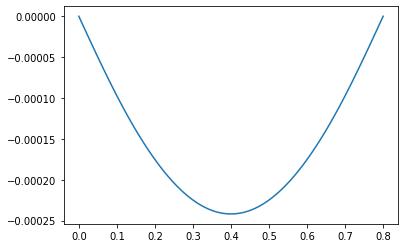

maximum displacement is: -0.00024187677673949436


In [33]:
h = 50/1000
w = 10/1000
L = 800/1000
Pq = 625 #N/m
P = 250
E = 210E9
I = 1/12*w*h**3

x1 = 0.1
x2 = 0.7

x = np.linspace(0,L,100)
def Dis4(xpos):
    if xpos < x1:
        d1 = ((P*(L-x1)*xpos)/(6*E*I*L))*(xpos**2 + (L-x1)**2 -L**2)
        d2 = ((P*(L-x2)*xpos)/(6*E*I*L))*(xpos**2 + (L-x2)**2 -L**2) 
        d3 = ((Pq*xpos)/(24*E*I))*(2*L*xpos**2 - xpos**3 -L**3)
    elif (xpos >= x1) and (xpos < x2):
        d1 = ((P*(x1)*(L-xpos))/(6*E*I*L))*(xpos**2 + (x1)**2 - 2*L*xpos)
        d2 = ((P*(L-x2)*xpos)/(6*E*I*L))*(xpos**2 + (L-x2)**2 -L**2)  
        d3 = ((Pq*xpos)/(24*E*I))*(2*L*xpos**2 - xpos**3 -L**3)
    elif xpos >= x2:
        d1 = ((P*(x1)*(L-xpos))/(6*E*I*L))*(xpos**2 + (x1)**2 - 2*L*xpos)
        d2 = ((P*(x2)*(L-xpos))/(6*E*I*L))*(xpos**2 + (x2)**2 - 2*L*xpos)
        d3 = ((Pq*xpos)/(24*E*I))*(2*L*xpos**2 - xpos**3 -L**3)
       
    return d1+d2+d3

def multiDis4(x):
    a = []
    for i in x:
        a.append(Dis4(i))
        
    return a


v = multiDis4(x)
plt.plot(x,v)
plt.show()

print('maximum displacement is:',min(v))


## 4.2 Estimate the normal and shear stresses in the beam at the points where you expect them to be a maximum from the previously computed solutions [3]

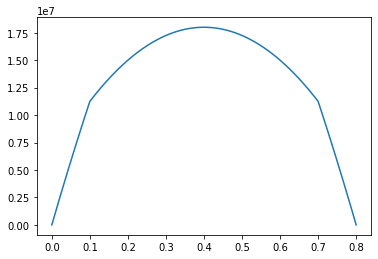

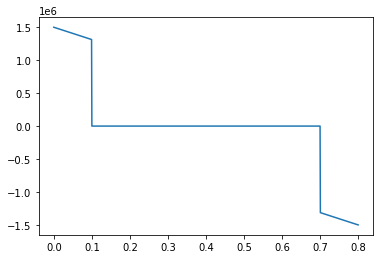

In [26]:
x = np.linspace(0,L,1000)
def Mom4(xpos):
    if xpos < x1:
        mom =((-P*(x1-xpos)-P*(x2-xpos))  + 200 )/2
    elif (xpos >= x1) and (xpos < x2):
        mom =((P*(x1-xpos)-P*(x2-xpos)) + 200)/2
    elif xpos >= x2:
        mom = ((P*(x1-xpos)+P*(x2-xpos)) + 200)/2

    return mom +(Pq*xpos/2)*(L-xpos)

def multiMom4(x):
    a = []
    for i in x:
        a.append(Mom4(i)*(h/2)/I)
        
    return a

def sxyFunc4(xpos):
    a =[]
    for i in xpos:
        if i < x1:
            a.append((P*(h/2*w)*h/4/(I*w))+((-Pq*i+(Pq*L/2))*(h/2*w)*h/4/(I*w)))
        elif (i >= x1) and (i < x2): 
            a.append(0)
        elif i >= x2:
            a.append( -P*(h/2*w)*h/4/(I*w)+((-Pq*i+(Pq*L/2))*(h/2*w)*h/4/(I*w)))

        
    return a

m = multiMom4(x)
plt.plot(x,m)
plt.show()

plt.plot(x,sxyFunc4(x))
plt.show()

## 4.3 Give the FEM result from the previously computed FEM results and compare against the esitmated displacement and stress estimates from the previous two questions at nodes 15 - 23 for displacement and nodes 29,31,33,35,37 for $\sigma_{xx}$ and 15,17,19,21,23 for $\sigma_{xy}$.

In [ ]:
from IPython.display import Image
Image(filename="SV_mesh_with_numbers_including_elements.png",embed=True)

## 4.4 Rename the input file beamq1.inp to beamq4.inp and modify the input file to reflect the outlined problem. Confirm your estimate of the FEM solution from the previous question at nodes 15 - 23 for displacement and nodes 29,31,33,35,37 for $\sigma_{xx}$ and 15,17,19,21,23 for $\sigma_{xy}$.

In [ ]:
from IPython.display import Image
Image(filename="SV_mesh_with_numbers_including_elements.png",embed=True)

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0060 seconds.
Done assembling K and F    :   0.0199 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0090 seconds.
Done post-processing stress:   0.0040 seconds.
Done writing output        :   0.0020 seconds.


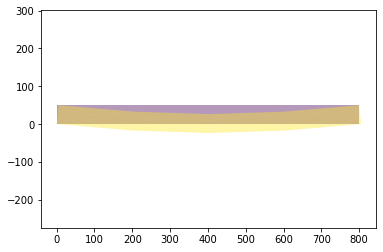

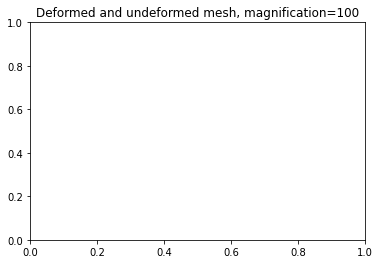

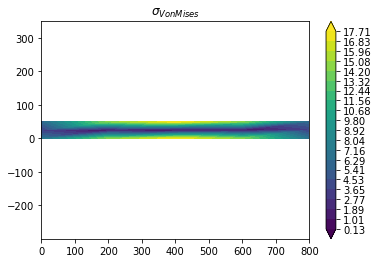

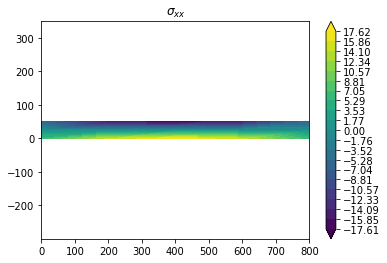

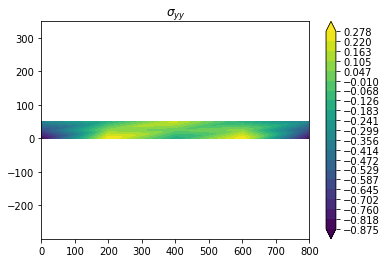

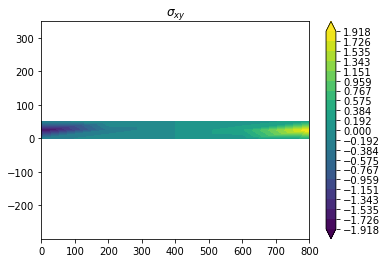

In [46]:
U, ReactionForces, VonMises, SXX, SYY, SXY = launch_fem('beamq4',MagFac=100)

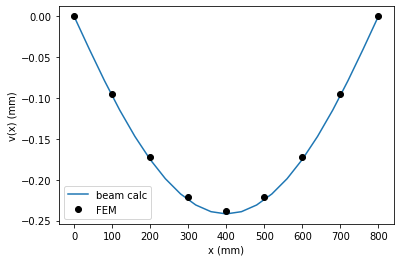

The Fem produces similar answers in displacements as the beam calculation but maybee a little less in magnitude.


In [47]:
x = np.linspace(0,0.8,21)
v = np.multiply(multiDis4(x),1000)
plt.plot(x*1000, v ,label='beam calc') # multiply by 1000 - as estimates are in m not mm
plt.plot([0,100,200,300,400,500,600,700,800],U[2*(nodes-1)+1],'ko',label='FEM');plt.ylabel('v(x) (mm)');plt.xlabel('x (mm)')
plt.legend()
plt.show()


print('The Fem produces similar answers in displacements as the beam calculation but maybee a little less in magnitude.')

Stress has discontenueties at shared nodes. 
The FEM and the Beam have a similar shape but errors are getting substantial.Considder more elements.


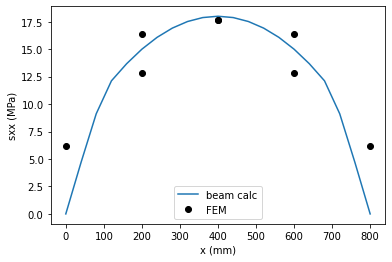

In [48]:
x = np.linspace(0,0.8,21)
sxx = np.divide(multiMom4(x),1E6)

plt.plot(x*1000,sxx,label='beam calc')
FEM_STRESSXX_BOTTOM = [SXX[0,0],SXX[0,1],SXX[1,0],SXX[1,1],SXX[2,0],SXX[2,1],SXX[3,0],SXX[3,1]]
plt.plot([0,200,200,400,400,600,600,800],FEM_STRESSXX_BOTTOM,'ko',label='FEM');plt.ylabel('sxx (MPa)');plt.xlabel('x (mm)')
plt.legend()

print('Stress has discontenueties at shared nodes. ')
print('The FEM and the Beam have a similar shape but errors are getting substantial.Considder more elements.')

Still see a discontinuety at the shared nodes. But it is small.
The FEM and the beam calculation corrolate well.


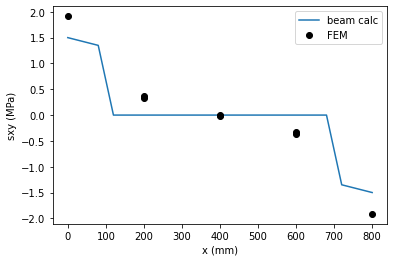

In [49]:
x = np.linspace(0,0.8,21)

sxy = np.divide(sxyFunc4(x),1E6)

plt.plot(x*1000,sxy,label='beam calc')
FEM_STRESSXY_BOTTOM = [-SXY[0,3],-SXY[0,2],-SXY[1,3],-SXY[1,2],-SXY[2,3],-SXY[2,2],-SXY[3,3],-SXY[3,2]]
plt.plot([0,200,200,400,400,600,600,800],FEM_STRESSXY_BOTTOM,'ko',label='FEM');plt.ylabel('sxy (MPa)');plt.xlabel('x (mm)')
plt.legend()

print('Still see a discontinuety at the shared nodes. But it is small.')
print('The FEM and the beam calculation corrolate well.')